
Matrice d’interconnexion entre lignes :

ligne_2  A01534  A01535  A01536  A01537  A01538  A01539  A01540  A01541  \
ligne_1                                                                   
A01191        0       0       0       0       1       0       1       0   
A01192        1       0       0       0       0       0       0       0   
A01193        1       0       0       1       0       0       3       3   
A01516        0       0       0       0       0       0       0       0   
A01534        0       2       0       1       1       2       2       3   
A01535        0       0       2       1       2       2       1       0   
A01536        0       0       0       1       1       0       1       2   
A01537        0       0       0       0       2       3       2       1   
A01538        0       0       0       0       0       1       3       2   
A01539        0       0       0       0       0       0       1       2   
A01540        0       0       0       0       0       0   

/var/folders/79/75kpj7sx7qlbhtz8l6x_tcpm0000gn/T/ipykernel_43262/3640233464.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


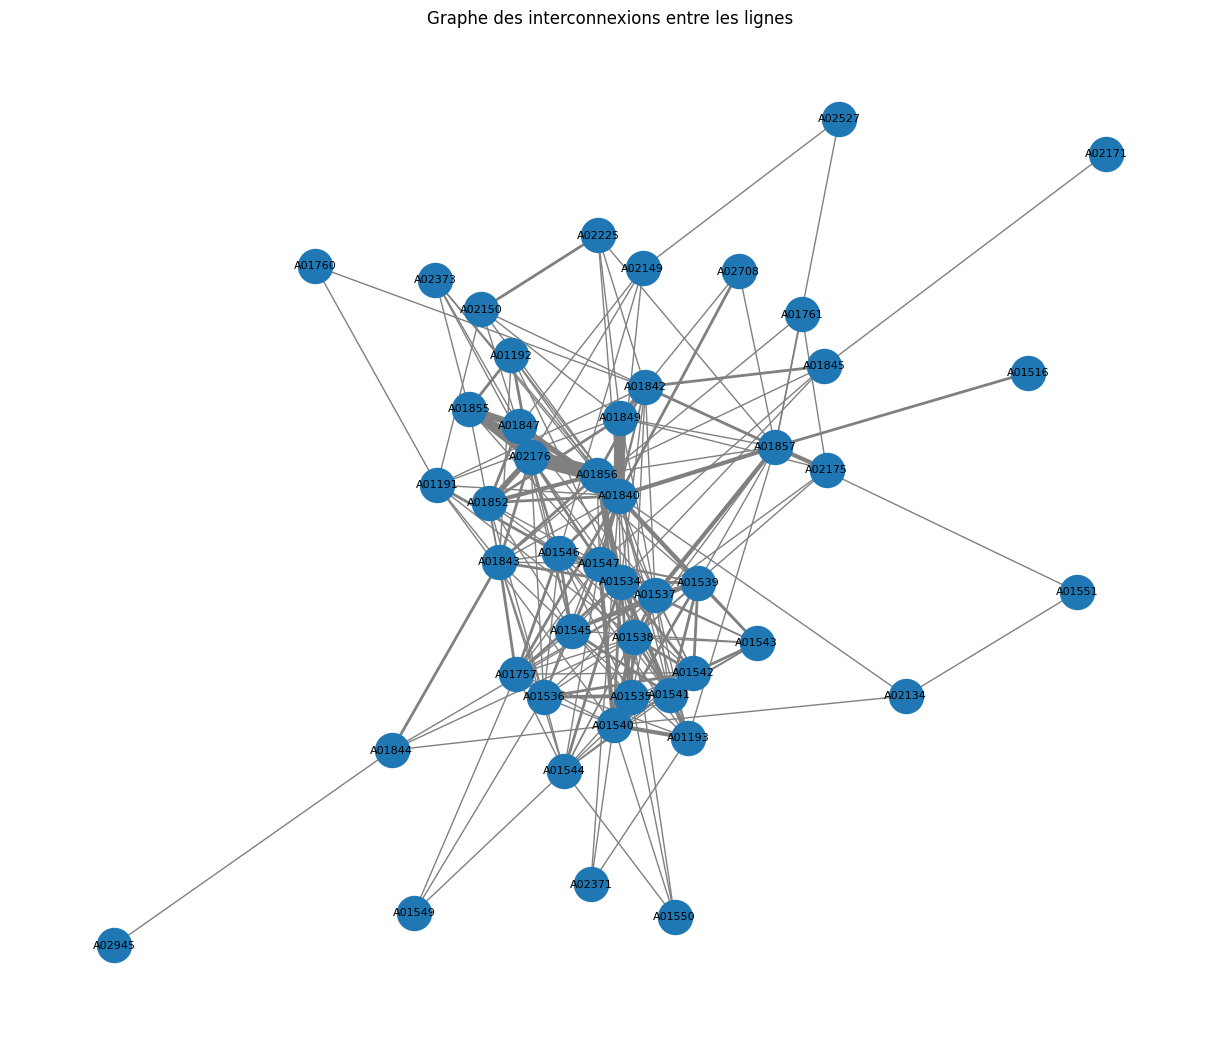

In [6]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv("emplacement-des-gares-idf-data-generalisee.csv", sep=';')

# Extraire les identifiants de ligne
df = df.dropna(subset=['idrefliga'])
df['idrefliga'] = df['idrefliga'].astype(str)
df["liste_lignes"] = df["idrefliga"].apply(lambda x: [i.strip() for i in x.split("/")])

#print(df['liste_lignes'])

# Construire les paires d’interconnexions par gare
connexions = []
for lignes in df['liste_lignes']:
    if len(lignes) > 1:
        connexions.extend(combinations(sorted(set(lignes)), 2))

# Compter les connexions 
connexions_df = pd.DataFrame(connexions, columns=['ligne_1', 'ligne_2'])
matrice = connexions_df.value_counts().unstack(fill_value=0)

# Afficher la matrice
print("\nMatrice d’interconnexion entre lignes :\n")
print(matrice.fillna(0).astype(int))

# Visualisation du graphe d’interconnexions
G = nx.Graph()
for (ligne1, ligne2), count in connexions_df.value_counts().items():
    G.add_edge(ligne1, ligne2, weight=count)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=600, width=weights, edge_color='gray', font_size=8)
plt.title("Graphe des interconnexions entre les lignes")
plt.tight_layout()
plt.show()
